<a href="https://colab.research.google.com/github/thenukan/assignment_4/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

question 01 - a gradient desent

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:_', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:_', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print('x_train:_', x_train.shape)
print('y_train:_', y_train.shape)
batch_size = Ntr
iterations = 300
lr = 1.46e-2
lr_decay=0.999
reg =2.31e-6
loss_history = []
learning_rate=[]
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
  # Forward pass
  y_pred=np.dot(x_train,w1)+b1
  Loss=(1/Ntr)*np.sum((y_pred-y_train)**2) + reg*np.sum(w1*2)

  loss_history.append(Loss)

  # Backward pass
  dw1 = 2*(1/Ntr)*(x_train.T.dot(y_pred - y_train))  + 2*reg*w1 
  w1 = w1 - lr*dw1

  db1=2*(1/Ntr)*(sum((y_pred-y_train),0))
  b1=b1-lr*db1

def accuracy(true,pred):
    l=[]
    for i in range(len(true)):
        max_t = max(list(true[i]))
        max_t_index = list(true[i]).index(max_t)
        max_p = max(list(pred[i]))
        max_p_index = list(pred[i]).index(max_p)
        if max_t_index == max_p_index:
            l.append("a")
    return(len(l)/len(true))
    
  #Accuracies
train_acc = accuracy(y_train,y_pred)
train_acc_history.append(train_acc)
learning_rate.append(lr)
print("iteration={} loss={} traing accuracy={} learning rate={}".format(t+1,Loss,train_acc,lr))

  
lr=lr*lr_decay
indices = np.arange(Ntr)
rng.shuffle(indices)


x_train:_ (50000, 32, 32, 3)
x_train:_ (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
x_train:_ (50000, 3072)
y_train:_ (50000, 10)
iteration=300 loss=0.7813972638829464 traing accuracy=0.4215 learning rate=0.0146


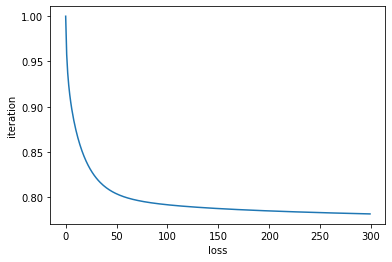

In [9]:
fig , ax = plt.subplots()
ax.plot(loss_history)
ax.set_xlabel('loss')
ax.set_ylabel('iteration')
plt.show()

In [10]:

def accuracy(true,pred):
    l=[]
    for i in range(len(true)):
        max_t = max(list(true[i]))
        max_t_index = list(true[i]).index(max_t)
        max_p = max(list(pred[i]))
        max_p_index = list(pred[i]).index(max_p)
        if max_t_index == max_p_index:
            l.append("a")
    return(len(l)/len(true))

print(w1.shape)
print(y_test.shape)
print(x_test.shape)
print(b1.shape)
y_pred_T=np.dot(x_test,w1)+b1
T_Loss=(1/Ntr)*np.sum((y_pred_T-y_test)**2) + reg*np.sum(w1*2)

test_acc = accuracy(y_test,(x_test@w1 + b1))
print("test loss={} and test accuracy={}".format(T_Loss,test_acc))


(3072, 10)
(10000, 10)
(10000, 3072)
(10,)
test loss=0.15737459926447217 and test accuracy=0.406


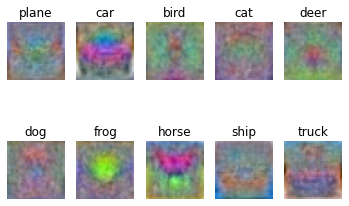

In [11]:
w = w1.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1 )
      
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8') )
    plt.axis('off')
    plt.title(classes[i])

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10,mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:_', x_train.shape)

Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train = x_train[range(Ntr),:]
x_test = x_test[range(Nte),:]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]
K = len(np.unique(y_train)) 
 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
 
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

H=200

std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1=np.zeros(H)
b2=np.zeros(K)
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)
batch_size = Ntr

iterations = 300    
lr=0.005
lr_decay = 0.999
reg = 5e-6
loss_history = []
learning_rate=[]
train_acc_history = []
val_acc_history = []
for t in range(iterations):
    batch_indices= np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    loss = (1./batch_size)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)
    if t%10 == 0:
        print("iterarion %d/%d: loss %f" %(t,iterations,loss))
    dy_pred = (1.0/batch_size)*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -=lr*db1
    b2 -= lr*db2
    lr = lr*lr_decay 

170500096/170498071 [==============================] - 6s 0us/step
x_train:_ (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iterarion 0/300: loss 0.999995
iterarion 10/300: loss 0.908176
iterarion 20/300: loss 0.869021
iterarion 30/300: loss 0.856665
iterarion 40/300: loss 0.848199
iterarion 50/300: loss 0.839411
iterarion 60/300: loss 0.832967
iterarion 70/300: loss 0.828917
iterarion 80/300: loss 0.824209
iterarion 90/300: loss 0.820978
iterarion 100/300: loss 0.815100
iterarion 110/300: loss 0.812050
iterarion 120/300: loss 0.807461
iterarion 130/300: loss 0.803627
iterarion 140/300: loss 0.801793
iterarion 150/300: loss 0.797483
iterarion 160/300: loss 0.795740
iterarion 170/300: loss 0.792312
iterarion 180/300: loss 0.789062
iterarion 190/300: loss 0.788256
iterarion 200/300: loss 0.784857
iterarion 210/300: loss 0.782086
iterarion 220/300: loss 0.779083
iterarion 230/300: loss 0.777444
iterarion 240/300: loss 0.775762
iterarion 250/300: loss 0.775651
iterar

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

x_train -> (50000, 3072)
train_acc =  0.42612
x_test -> (10000, 3072)
test_acc =  0.4173


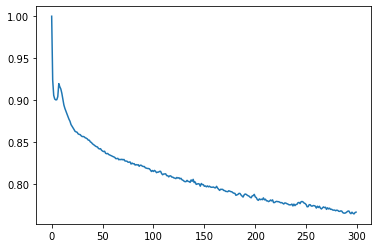

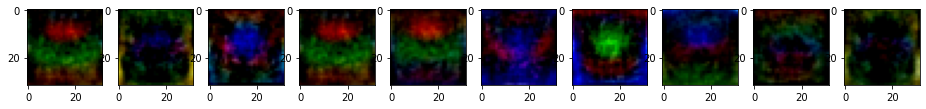

In [3]:
def accuracy(true,pred):
    l=[]
    for i in range(len(true)):
        max_t = max(list(true[i]))
        max_t_index = list(true[i]).index(max_t)
        max_p = max(list(pred[i]))
        max_p_index = list(pred[i]).index(max_p)
        if max_t_index == max_p_index:
            l.append("a")
    return(len(l)/len(true))

plt.plot(loss_history)
f,axarr = plt.subplots(1,10)
f.set_size_inches(16,6)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show 

x_t = x_train
print("x_train ->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2
train_acc = accuracy(y_train,y_pred)
print("train_acc = ",train_acc)


x_t = x_test
print("x_test ->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2
train_acc = accuracy(y_test,y_pred)
print("test_acc = ",train_acc)


Question_3 stocastic gradient decend (batch gradient decent)

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10,mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:_', x_train.shape)

Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train = x_train[range(Ntr),:]
x_test = x_test[range(Nte),:]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]
K = len(np.unique(y_train)) 
 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
 
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

H=200

std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1=np.zeros(H)
b2=np.zeros(K)
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)

batch_size = 500

iterations = 300  
lr=0.005
lr_decay = 0.999
reg = 4e-6
loss_history = []
learning_rate=[]
train_acc_history = []
val_acc_history = []
for t in range(iterations):
    for i in range(int(Ntr/batch_size)):
        batch_indices= np.array(range((i*batch_size),((i+1)*batch_size)))
        x=x_train[batch_indices]
        y=y_train[batch_indices]
        h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
        y_pred = h.dot(w2)+b2
        loss = (1./batch_size)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
        loss_history.append(loss)
        if t%10 == 0 and i%99==0:
            print("iterarion %d/%d: loss %f" %(t,iterations,loss))
        dy_pred = (1.0/batch_size)*2.0*(y_pred-y)
        dw2=h.T.dot(dy_pred)+reg*w2
        db2=dy_pred.sum(axis=0)
        dh=dy_pred.dot(w2.T)
        dw1=x.T.dot(dh*h*(1-h)) + reg*w1
        db1=(dh*h*(1-h)).sum(axis=0)
        w1 -= lr*dw1
        w2 -= lr*dw2
        b1 -=lr*db1
        b2 -= lr*db2
        lr = lr*lr_decay 

170500096/170498071 [==============================] - 6s 0us/step
x_train:_ (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iterarion 0/300: loss 1.000003
iterarion 0/300: loss 0.821317
iterarion 10/300: loss 0.712166
iterarion 10/300: loss 0.714148
iterarion 20/300: loss 0.682010
iterarion 20/300: loss 0.686794
iterarion 30/300: loss 0.670077
iterarion 30/300: loss 0.676550
iterarion 40/300: loss 0.665343
iterarion 40/300: loss 0.672746
iterarion 50/300: loss 0.663463
iterarion 50/300: loss 0.671307
iterarion 60/300: loss 0.662754
iterarion 60/300: loss 0.670704
iterarion 70/300: loss 0.662490
iterarion 70/300: loss 0.670462
iterarion 80/300: loss 0.662392
iterarion 80/300: loss 0.670369
iterarion 90/300: loss 0.662356
iterarion 90/300: loss 0.670334
iterarion 100/300: loss 0.662342
iterarion 100/300: loss 0.670322
iterarion 110/300: loss 0.662338
iterarion 110/300: loss 0.670317
iterarion 120/300: loss 0.662336
iterarion 120/300: loss 0.670315
iterarion 130/300

In [5]:
def accuracy(true,pred):
    l=[]
    for i in range(len(true)):
        max_t = max(list(true[i]))
        max_t_index = list(true[i]).index(max_t)
        max_p = max(list(pred[i]))
        max_p_index = list(pred[i]).index(max_p)
        if max_t_index == max_p_index:
            l.append("a")
    return(len(l)/len(true))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

x_train -> (50000, 3072)
train_acc =  0.54668
x_test -> (10000, 3072)
test_acc =  0.465


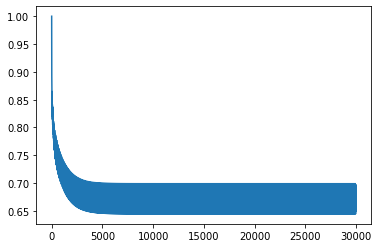

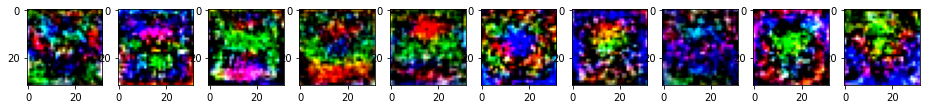

In [6]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
f,axarr = plt.subplots(1,10)
f.set_size_inches(16,6)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show 

x_t = x_train
print("x_train ->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2
train_acc = accuracy(y_train,y_pred)
print("train_acc = ",train_acc)


x_t = x_test
print("x_test ->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2
train_acc = accuracy(y_test,y_pred)
print("test_acc = ",train_acc)


question 4

2.4.1
train_images.shape:  (50000, 32, 32, 3)
train_labels.shape:  (50000, 1)
test_images.shape: (10000, 32, 32, 3)
test_labels.shape: (10000, 1)


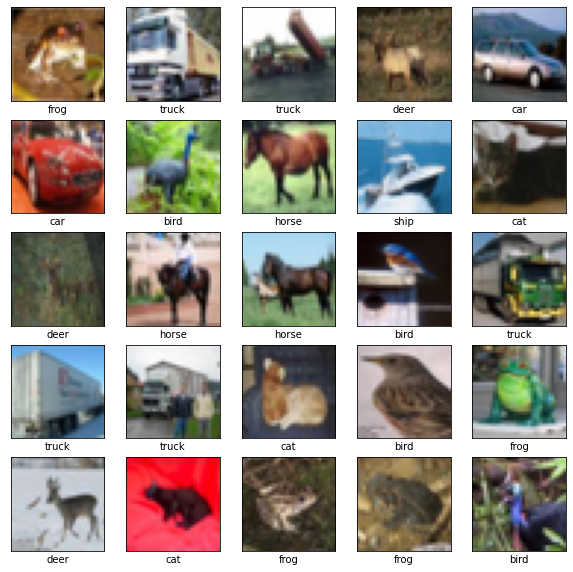

Epoch 1/50
1000/1000 [==============================] - 42s 13ms/step - loss: 2.1523 - accuracy: 0.2207 - val_loss: 1.8652 - val_accuracy: 0.3486
Epoch 2/50
1000/1000 [==============================] - 12s 12ms/step - loss: 1.7984 - accuracy: 0.3667 - val_loss: 1.6451 - val_accuracy: 0.4208
Epoch 3/50
1000/1000 [==============================] - 12s 12ms/step - loss: 1.6446 - accuracy: 0.4136 - val_loss: 1.5436 - val_accuracy: 0.4409
Epoch 4/50
1000/1000 [==============================] - 12s 12ms/step - loss: 1.5404 - accuracy: 0.4461 - val_loss: 1.4788 - val_accuracy: 0.4693
Epoch 5/50
1000/1000 [==============================] - 12s 12ms/step - loss: 1.4810 - accuracy: 0.4662 - val_loss: 1.4298 - val_accuracy: 0.4791
Epoch 6/50
1000/1000 [==============================] - 12s 12ms/step - loss: 1.4279 - accuracy: 0.4879 - val_loss: 1.4071 - val_accuracy: 0.4952
Epoch 7/50
1000/1000 [==============================] - 12s 12ms/step - loss: 1.3872 - accuracy: 0.5061 - val_loss: 1.3625 -

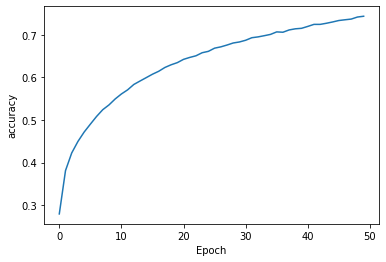

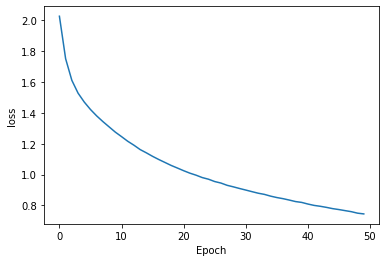

313/313 - 2s - loss: 0.9096 - accuracy: 0.6906
Test accuracy =  0.6905999779701233
Test loss =  0.9095792174339294


In [7]:

%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
mnist = keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()



print('train_images.shape: ', x_train.shape)
print('train_labels.shape: ', y_train.shape)
print('test_images.shape:', x_test.shape)
print('test_labels.shape:', y_test.shape)
#lass_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
 
train_images = tf.dtypes.cast(x_train,tf.float32)
test_images = tf.dtypes.cast(x_test,tf.float32)
train_images = train_images / 255.0
test_images = test_images / 255.0


class_names=['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.gray)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

y_train = keras.utils.to_categorical(y_train, 10) 
y_test = keras.utils.to_categorical(y_test, 10) 

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

opt = keras.optimizers.SGD(lr=0.001, momentum=0.6)
cce = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=opt, loss=cce, metrics=['accuracy']) 
history = model.fit(train_images, y_train, batch_size=50, epochs=50,validation_data = (test_images, y_test))

fig , ax1 = plt.subplots()
ax1.plot(history.history['accuracy'],label ='accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('accuracy')
plt.show()

fig , ax2 = plt.subplots()
ax2.plot(history.history['loss'],label ='loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('loss')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  y_test, verbose=2)
print('Test accuracy = ', test_acc)
print('Test loss = ', test_loss)